# Metody obliczeniowe w nauce i technice

## Laboratorium 2 - Interpolacja - 10.03.2020r.

### Sprawozdanie sporządził: Marcin Zielonka

### Wstęp

Do przeprowadzenia wszystkich obliczeń i wyrysowania wykresów, skorzystam z gotowych funkcjonalności zawartych w bibliotekach `numpy`, `matplotlib`, `math` oraz `scipy`

In [1]:
from numpy import linalg, vander, linspace
from matplotlib import pyplot as plt
from math import cos, sin, pi
from scipy import interpolate

### Zadanie 1:
Dla funkcji $f(x)=\frac{1}{1+x^2}$ i $n=5,10,15$ wylicz wielomian interpolacyjny $p_{n}$ z $n+1$ wezłami równoodleŋłymi w przedziale $[-5,5]$.

a) Narysuj funkcję $f(x)$ oraz $p_{n}(x)$

b) Wylicz i narysuj reszty interpolacji $\epsilon(x)=f(x)-p_{n}(x)$ w 30 równoodległych punktach powyższego przedziału.

Aby docelowy kod realizujący zadanie był bardziej przejrzysty, wydzielę funkcje obliczające funkcję $f(x)=\frac{1}{1+x^2}$ oraz wielomian interpolacyjny $p_n$

In [2]:
def f(x):
    return 1.0 / (1.0 + x ** 2.0)

In [3]:
def p(x, coefficients):
    sum = 0
    for i in range(len(coefficients)):
        sum = sum + coefficients[i] * x ** i

    return sum

Do zinterpolowania funkcji wykorzystam interpolację wielomianową z macierzą Vandermonda.

In [4]:
def interpolate_lin(n, error_checks):
    xs = linspace(-5, 5, n + 1)
    ys = list(map(f, xs))

    vand = vander(xs, increasing=True)
    solv = linalg.solve(vand, ys)

    plot_x = linspace(-5, 5, 10 ** 4)

    plot_y_real = list(map(f, plot_x))
    plot_y_int = [p(x, solv) for x in plot_x]

    plt.plot(plot_x, plot_y_real, 'bo', markersize=1)
    plt.plot(plot_x, plot_y_int, 'ro', markersize=1)
    plt.ylim(top=1.5)
    plt.ylim(bottom=0)

    plt.show()


    x_err = linspace(-5, 5, error_checks)
    y_err = [f(x) - p(x, solv) for x in x_err]

    plt.plot(x_err, y_err, 'go', markersize=1)
    plt.show()

Poniżej przedstawione wyniki dla wartości kolejno `n` = 5, 10, 20 oraz `error_checks` = 1000:

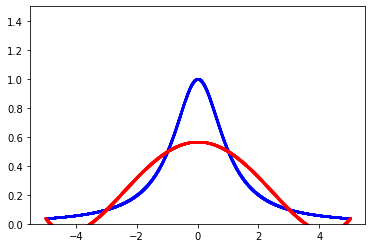

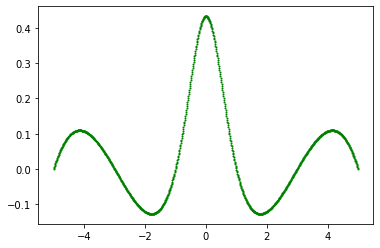

In [5]:
interpolate_lin(5, 1000)

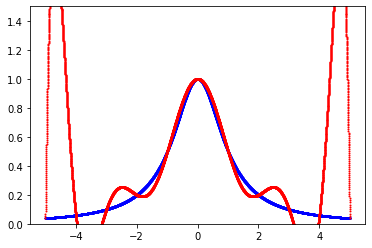

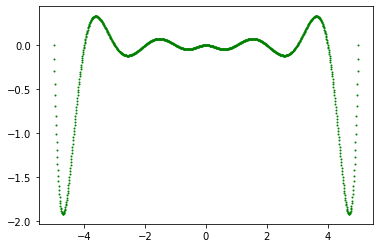

In [6]:
interpolate_lin(10, 1000)

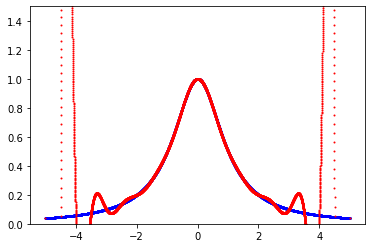

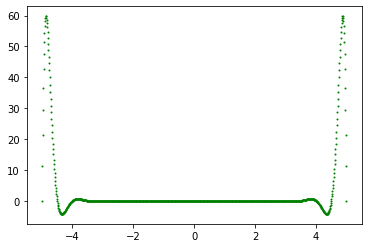

In [7]:
interpolate_lin(20, 1000)

Po przeanalizowaniu otrzymanych wyników, możemy zauważyć, że otzymana funkcja $p_n$ na krańcach przedziału mocno odbiega funkcji $f(x)$, natomiast w pozostałych miejscach - czym bliżej środka przedziału - funkcja interpolująca pokrywa się z funkcją pierwotną.

Jest to tzw. **efekt Rungego**. Zjawisko to zachodzi w momencie, w którym wykorzystujemy do interpolacji wielomian wysokiego stopnia i przy tym stosujemy równoodległe od siebie węzły.

W celu zniwelowania tego błędu na krańach przedziału, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji - jednym z przykładów są *węzły Czebyszewa*.

### Zadanie 2:
Dla danej funkcji i przedziału z poprzedniego zadania oraz $n = 15$ znajdź wielomian interpolacyjny w węzłach Czebyszewa, danych wzorem $x_k=\frac{1}{2}(a+b)+\frac{1}{2}(b-a)cos(\frac{2k-1}{2n}\pi)$ gdzie $k=1,...,n$, a $a,b$ są odpowiednio początkiem i końcem przedziału interpolacji. Narysuj wykres wynikowego wielomianu. W jaki sposób zmienił się błąd interpolacji w porównaniu do wyników z poprzedniego zadania? Czemu tak się stało?

Do przeprowadzenia obliczeń i wyrysowania wykresów, skorzystam z poprzednio zdefiniowanych funkcji `f` oraz `p`. Również sam algorytm do wyliczenia wielomianu $p_n$ będzie taki sam z jedną modyfikacją dot. sposobu wyznaczenia węzłów interpolacji.

In [8]:
def interpolate_chebyshev(n, error_checks):
    a = -5
    b = 5

    xs = [(0.5 * (a + b) + 0.5 * (b - a) * cos((2 * (i + 1) - 1) / (2 * (n + 1)) * pi)) for i in range(n + 1)]
    ys = list(map(f, xs))

    vand = vander(xs, increasing=True)
    solv = linalg.solve(vand, ys)

    plot_x = linspace(-5, 5, 10 ** 4)

    plot_y_real = list(map(f, plot_x))
    plot_y_int = [p(x, solv) for x in plot_x]

    plt.plot(plot_x, plot_y_real, 'bo', markersize=1)
    plt.plot(plot_x, plot_y_int, 'ro', markersize=1)
    plt.ylim(top=1.5)
    plt.ylim(bottom=0)

    plt.show()

    x_err = linspace(-5, 5, error_checks)
    y_err = [f(x) - p(x, solv) for x in x_err]

    plt.plot(x_err, y_err, 'go', markersize=1)
    plt.show()

Poniżej przedstawione wyniki dla wartości kolejno n = 5, 10, 20 oraz error_checks = 1000:

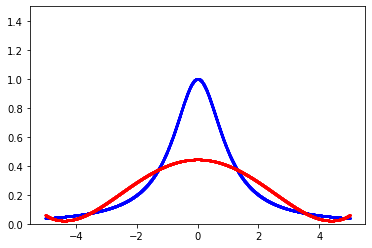

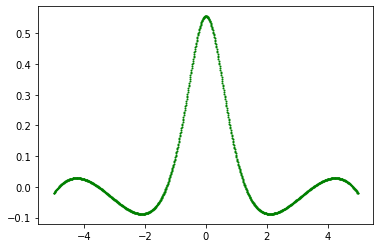

In [9]:
interpolate_chebyshev(5, 1000)

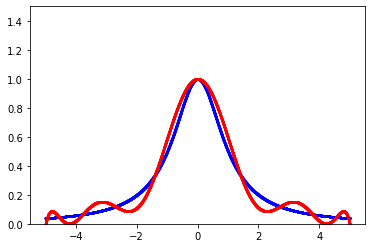

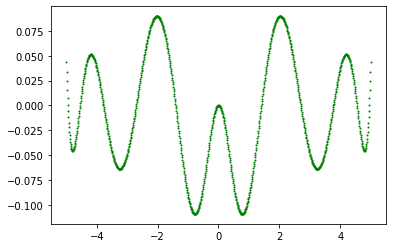

In [10]:
interpolate_chebyshev(10, 1000)

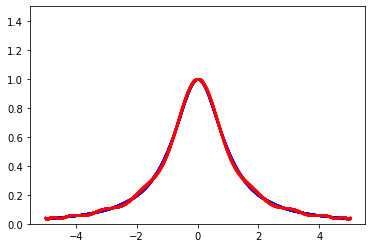

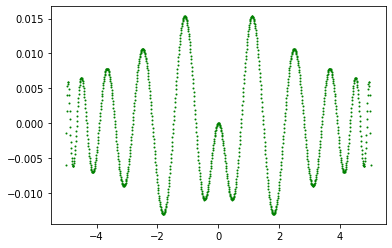

In [11]:
interpolate_chebyshev(20, 1000)

Jak widzimy błąd interpolacji na krańcach przedziału znacząco zmalał - nawet przy zastosowaniu wyższych stopni wielomianu. Takie zjawisko zawdzięczamy właśnie zastosowaniu innego sposobu rozmieszczenia węzłów interpolacyjnych - tj. gęściej na krańcach przedziałów kosztem rzadszego rozmieszczenia bliżej środka. Takie rozmieszczenie powoduje jednakże nieznaczne zmniejszenie dokładności wielomianu interpolującego względem pierwotnej funkcji, gdyż po środku jest wcześniej wspomniana mniejsza liczba węzłów.

### Zadanie 3:
Mając daną elipsę w postaci parametrycznej
$$\begin{cases}
x=a * cos(t) \\
y=b*sin(t)
\end{cases}
$$

gdzie $t\in[0,2\pi]$ wykonaj jej interpolację sześciennymi funkcjami sklejanymi dla 10 równoodległych wartości $t_i$. Interpolację wykonaj osobno dla zbiorów punktów $(t_i,x_i)$ oraz $(t_i,y_i)$, a następnie narysuj przybliżenie powyższej elipsy używając wyznaczonych funkcji dla 30 punktów.

Na potrzeby zadania przyjmijmy $a=5$ oraz $b=10$

In [12]:
a = 5
b = 10

Aby docelowy kod realizujący zadanie był bardziej przejrzysty, wydzielę funkcje obliczające wartość $x$ oraz $y$ na podstawie argumentu $t$

In [13]:
def f_x(t):
    return a * cos(t)

def f_y(t):
    return b * sin(t)

Następnie korzystając z gotowych funkcjonalności bibliotek `numpy` oraz `scipy` buduję algorytm wykonujący interpolację sześciennymi funkcjami sklejanymi.

In [14]:
def interpolate_elipse(n, plot_points):
    ts = linspace(0, 2 * pi, n)
    xs = list(map(f_x, ts))
    ys = list(map(f_y, ts))
    
    spline_x = interpolate.interp1d(ts, xs, kind='cubic')
    spline_y = interpolate.interp1d(ts, ys, kind='cubic')
    
    plot_x = []
    plot_y = []
    
    for t in linspace(0, 2 * pi, plot_points):
        plot_x.append(spline_x(t))
        plot_y.append(spline_y(t))
    
    plt.plot(plot_x, plot_y)
    
    plt.show()

Wykres przedstawiający działanie algorytmu dla wartości $n=10$ używając 30 punktów

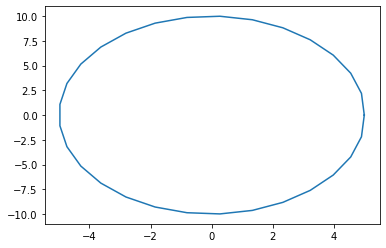

In [15]:
interpolate_elipse(10, 30)

Jak widzimy przybliżenie pierwotnej elipsy przy użyciu wyznaczonych funkcji sklejanych jest dosyć dokładne dla podanej wartosci $n=10$